In [25]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as f

xy = np.loadtxt('data/diabetes.csv.gz', delimiter=',', dtype='float32')

xy.shape


(759, 9)

In [26]:
x_data = torch.Tensor(torch.from_numpy(xy[:, 0:-1]))
y_data = torch.Tensor(xy[:, [-1]])

In [27]:
y_data.shape

torch.Size([759, 1])

In [28]:
x_data.shape

torch.Size([759, 8])

In [29]:
class My_Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(8,6)
        self.fc2 = nn.Linear(6,4)
        self.fc3 = nn.Linear(4,1)

        self.sigmoid = nn.Sigmoid()


    def forward(self, x):
        out1 = f.sigmoid(self.fc1(x))
        out2 = f.sigmoid(self.fc2(out1))
        out3 = f.sigmoid(self.fc3(out2))


        return out3


In [30]:
model = My_Model()

criteria = torch.nn.BCELoss(size_average=True)
optim = torch.optim.SGD(model.parameters(), lr=0.1)

In [31]:
losses = []

for epoch in range(100):
    y_pred = model(x_data)
    loss = criteria(y_pred, y_data)
    print('loss : ' , loss.data)
    losses.append(loss.data.item())

    optim.zero_grad()
    loss.backward()
    optim.step()

loss :  tensor(0.7348)
loss :  tensor(0.7267)
loss :  tensor(0.7193)
loss :  tensor(0.7126)
loss :  tensor(0.7065)
loss :  tensor(0.7010)
loss :  tensor(0.6960)
loss :  tensor(0.6914)
loss :  tensor(0.6873)
loss :  tensor(0.6835)
loss :  tensor(0.6800)
loss :  tensor(0.6769)
loss :  tensor(0.6741)
loss :  tensor(0.6715)
loss :  tensor(0.6691)
loss :  tensor(0.6670)
loss :  tensor(0.6650)
loss :  tensor(0.6633)
loss :  tensor(0.6616)
loss :  tensor(0.6602)
loss :  tensor(0.6588)
loss :  tensor(0.6576)
loss :  tensor(0.6565)
loss :  tensor(0.6554)
loss :  tensor(0.6545)
loss :  tensor(0.6537)
loss :  tensor(0.6529)
loss :  tensor(0.6522)
loss :  tensor(0.6515)
loss :  tensor(0.6509)
loss :  tensor(0.6504)
loss :  tensor(0.6499)
loss :  tensor(0.6494)
loss :  tensor(0.6490)
loss :  tensor(0.6486)
loss :  tensor(0.6483)
loss :  tensor(0.6480)
loss :  tensor(0.6477)
loss :  tensor(0.6474)
loss :  tensor(0.6472)
loss :  tensor(0.6470)
loss :  tensor(0.6468)
loss :  tensor(0.6466)
loss :  ten

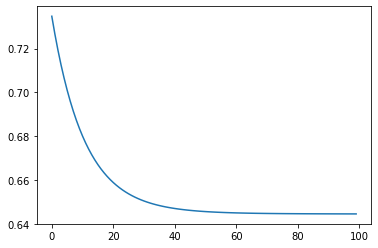

In [32]:
import matplotlib.pyplot as plt

plt.plot(range(100), losses)
plt.show()